## 1. Import libraries and data

In [1]:
# data manipulation
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

# data viz
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('default')

# MBA algorithm
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_csv('data\\items_purchased_data.csv')


(7500, 20)

## 2. Exploring the data

In [44]:
print(data.shape)
data.head()

(7500, 20)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualising occurences

In [10]:
# Gather all items of each transaction into a Numpy array
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i, j])

transaction = np.array(transaction)

# Transaform into a pandas dataframe
df = pd.DataFrame(transaction, columns=['items'])
df['incident_count'] = 1 # assign 1 to each item to create a countable table

# delete NaN items
indexNames = df[df['items'] == 'nan'].index
df.drop(indexNames, inplace=True)

df_table = df.groupby('items').sum().sort_values('incident_count', ascending=False).reset_index()

df_table.head(10).style.background_gradient(cmap='Blues')

c:\Users\Regan-John Daniels\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3931: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgbas = plt.cm.get_cmap(cmap)(norm(gmap))


,items,incident_count
0,mineral water,1787
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,990
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


### Visualising customers first choices

In [5]:
# Gather first item of each transaction

transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i, 0])

transaction = np.array(transaction)

# Transaform into a pandas dataframe
df_first = pd.DataFrame(transaction, columns=['items'])
df_first['incident_count'] = 1 # assign 1 to each item to create a countable table

# delete NaN items
indexNames = df_first[df_first['items'] == 'nan'].index
df_first.drop(indexNames, inplace=True)

df_table_first = df_first.groupby('items').sum().sort_values('incident_count', ascending=False).reset_index()
df_table_first['food'] = 'food'
df_table_first = df_table_first.truncate(before=-1, after=15) # first 15 choices

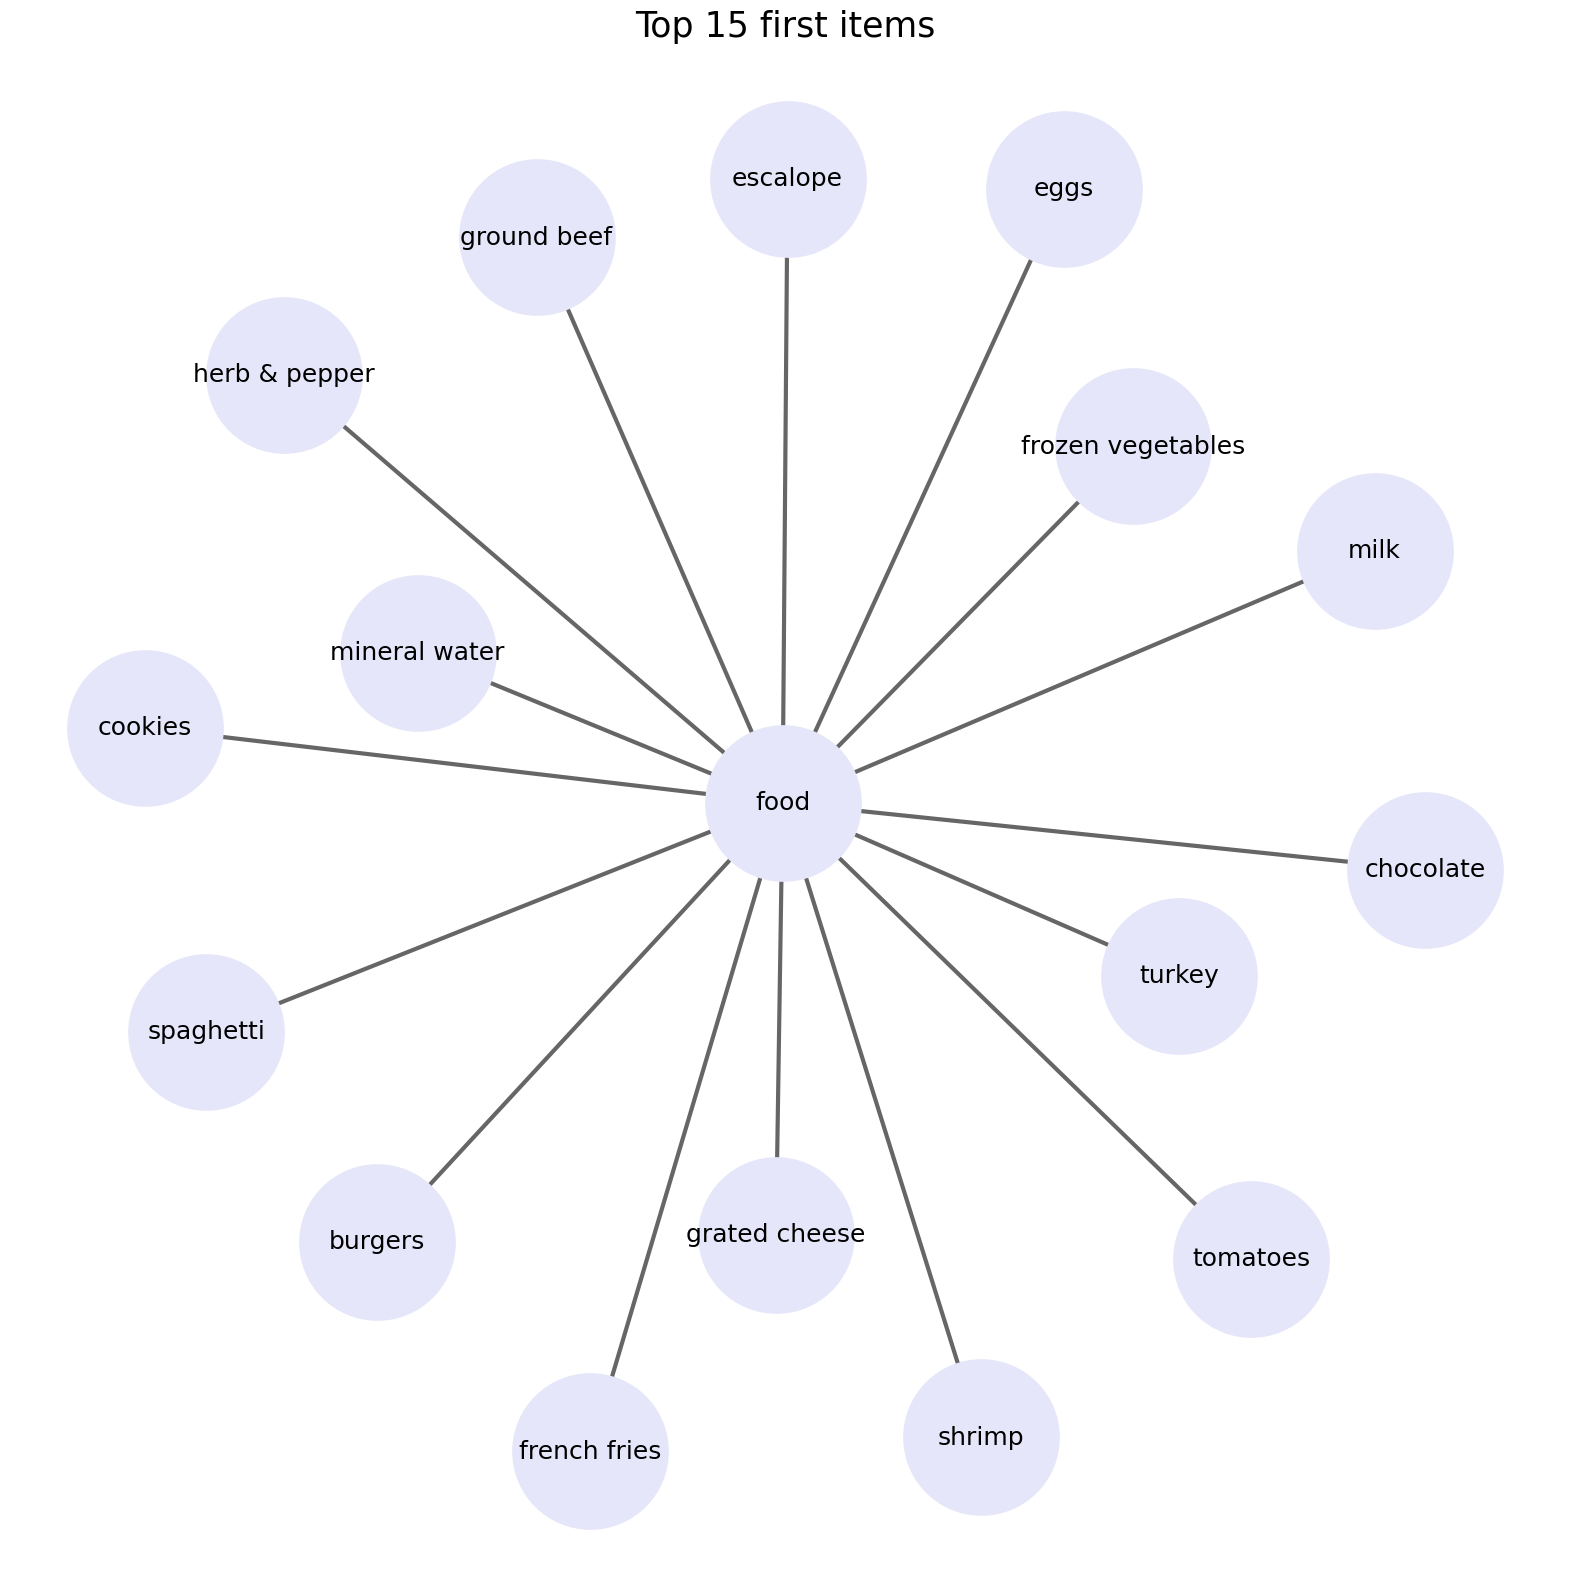

In [11]:
# visualise the top 15 first choices
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source='food', target='items', edge_attr=True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size=12500, node_color='lavender')
nx.draw_networkx_edges(first_choice, pos, width=3, alpha=0.6, edge_color='black')
nx.draw_networkx_labels(first_choice, pos, font_size=18, font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 first items', fontsize=25)
plt.show()

## 3. Data preprocessing for the algorithm

In [12]:
# Transform every transaction into a list and store transactions together in a Numpy array

transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i, j]) for j in range(data.shape[1])])

transaction= np.array(transaction)
transaction

array([['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['turkey', 'avocado', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [13]:
# True/False df

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# function to convert dataset into 1-hot encoded df

def encode_units(x):
    if x == True:
        return 1
    elif x == False:
        return 0


dataset = dataset.applymap(encode_units)
dataset.drop(columns='nan', inplace=True)
dataset.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Algorithm Implementation

In [42]:
# Extracting the most frequent itemsets via MLxtend
# length column added for ease of filtering

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['lenth'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,lenth
0,0.020267,(almonds),1
1,0.033200,(avocado),1
2,0.010800,(barbecue sauce),1
3,0.014267,(black tea),1
4,0.011467,(body spray),1
...,...,...,...
254,0.011067,"(milk, ground beef, mineral water)",3
255,0.017067,"(ground beef, spaghetti, mineral water)",3
256,0.015733,"(milk, spaghetti, mineral water)",3
257,0.010267,"(olive oil, spaghetti, mineral water)",3


In [43]:
# Get the basket analysis output
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules['antecedents_length'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_length'] = rules['consequents'].apply(lambda x: len(x))
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
161,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841,1,1
160,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,0.011139,1.135402,1,1
329,(ground beef),"(spaghetti, mineral water)",0.098267,0.059733,0.017067,0.173677,2.907540,0.011197,1.137893,1,2
328,"(spaghetti, mineral water)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,0.011197,1.262427,2,1
341,(olive oil),"(spaghetti, mineral water)",0.065733,0.059733,0.010267,0.156187,2.614731,0.006340,1.114306,1,2
...,...,...,...,...,...,...,...,...,...,...,...
101,(low fat yogurt),(eggs),0.076400,0.179733,0.016800,0.219895,1.223453,0.003068,1.051483,1,1
108,(escalope),(french fries),0.079333,0.170933,0.016400,0.206723,1.209376,0.002839,1.045116,1,1
109,(french fries),(escalope),0.170933,0.079333,0.016400,0.095944,1.209376,0.002839,1.018373,1,1
154,(shrimp),(green tea),0.071333,0.132000,0.011333,0.158879,1.203625,0.001917,1.031956,1,1


## 5. Interpreting the output

#### Interpreting the interaction between support, confidence and lift is the trick to this analysis.<br/>The highest possible value of all three of these variables is the best outcome.<br/><br/>Let's see a scatter plot showing the interaction of these variables<br/>We need to look for points as far to the top right as possible. Other values are not insignificant, but we need to start looking as far to the top right as possible

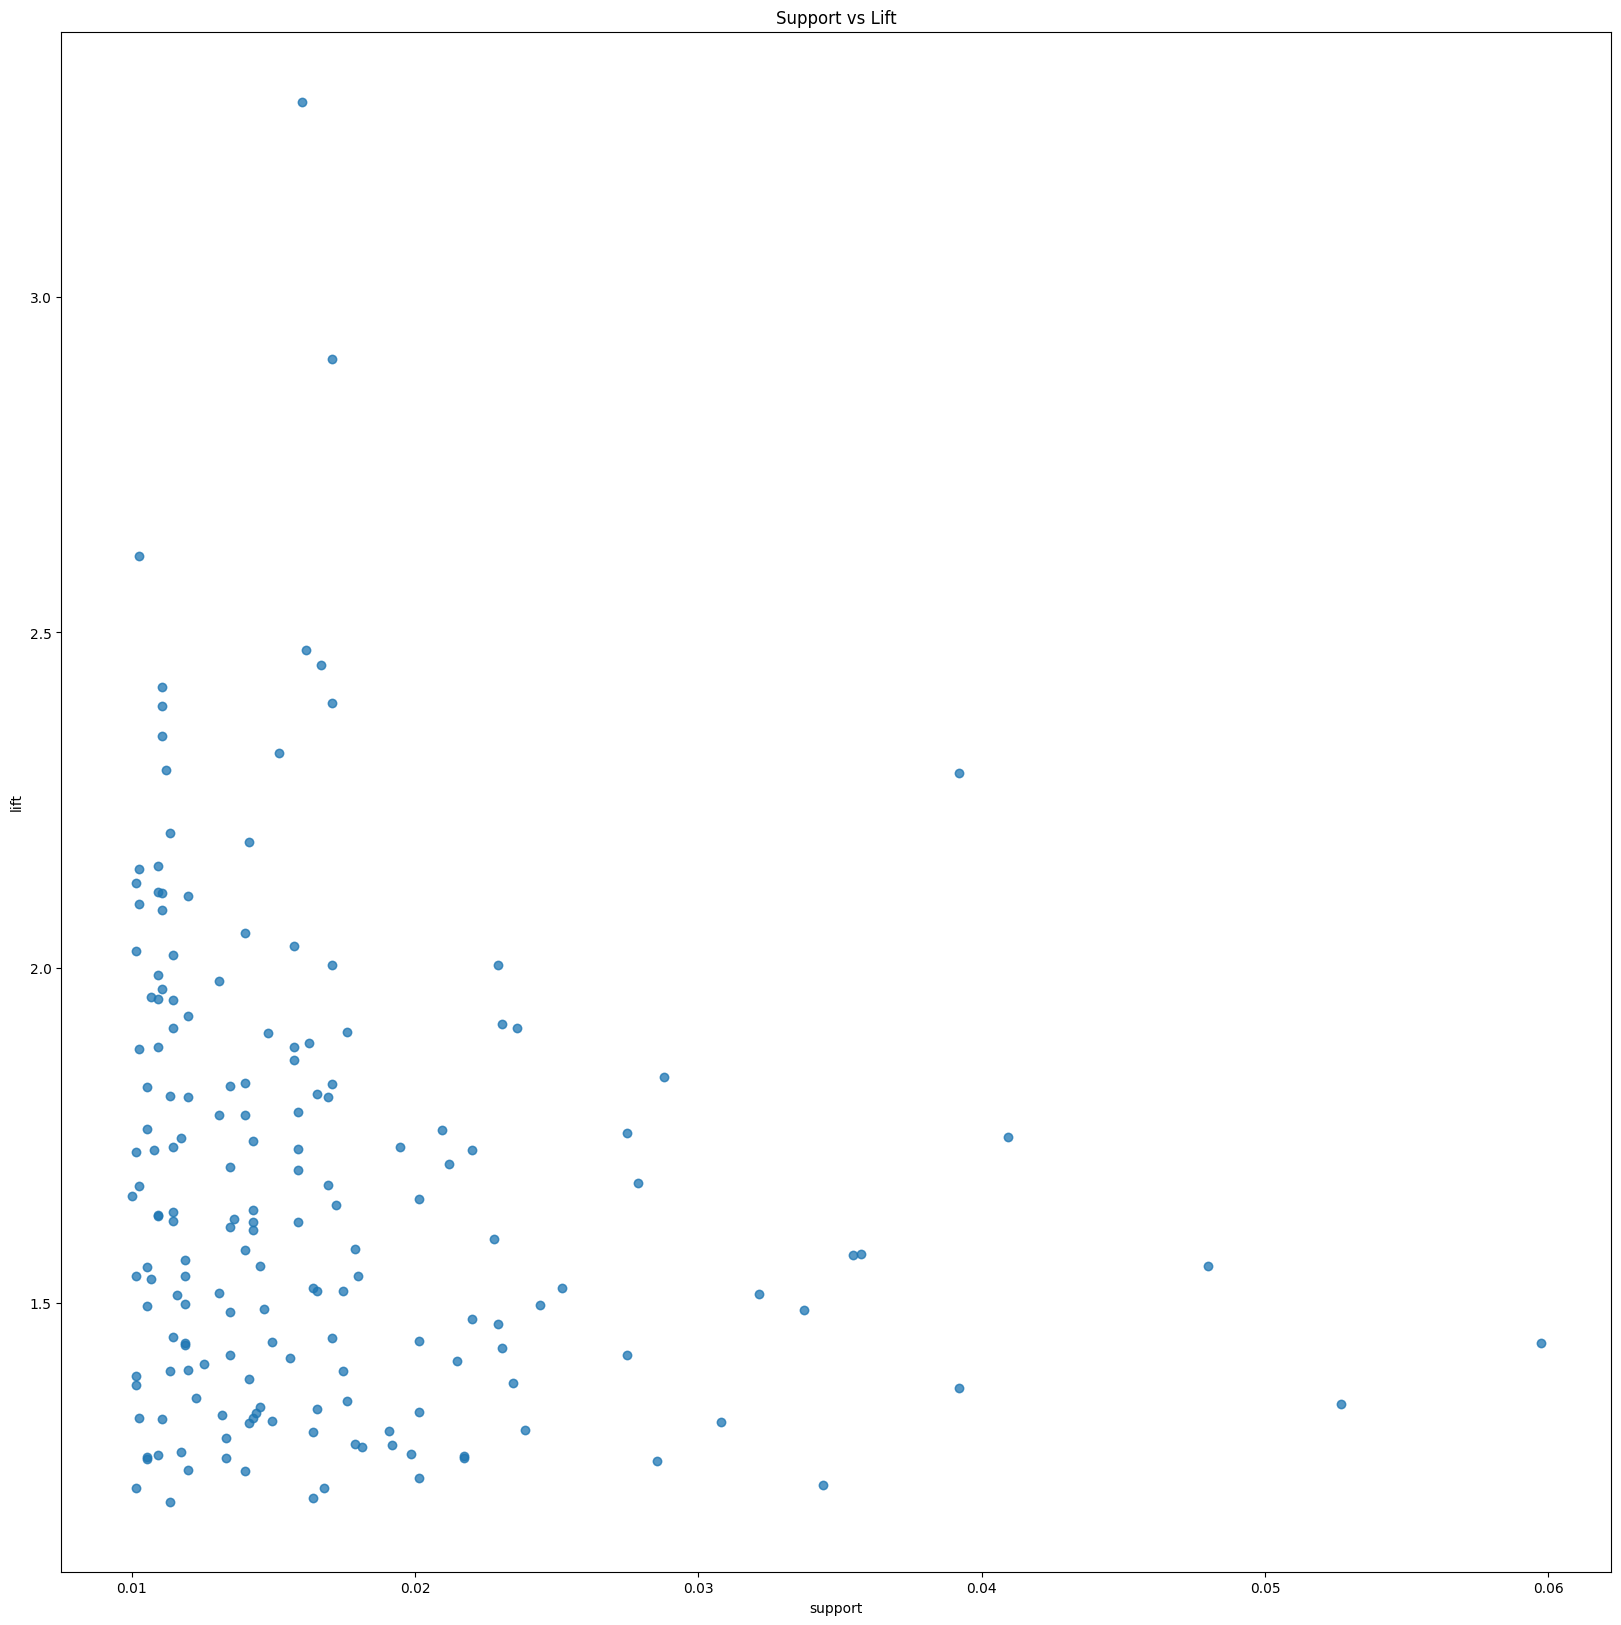

In [93]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#### Let's now look at confidence vs lift and add support as the size of the bubble.<br/>I'm now looking for values with the largest bubble possible as far to the top right as possbile.

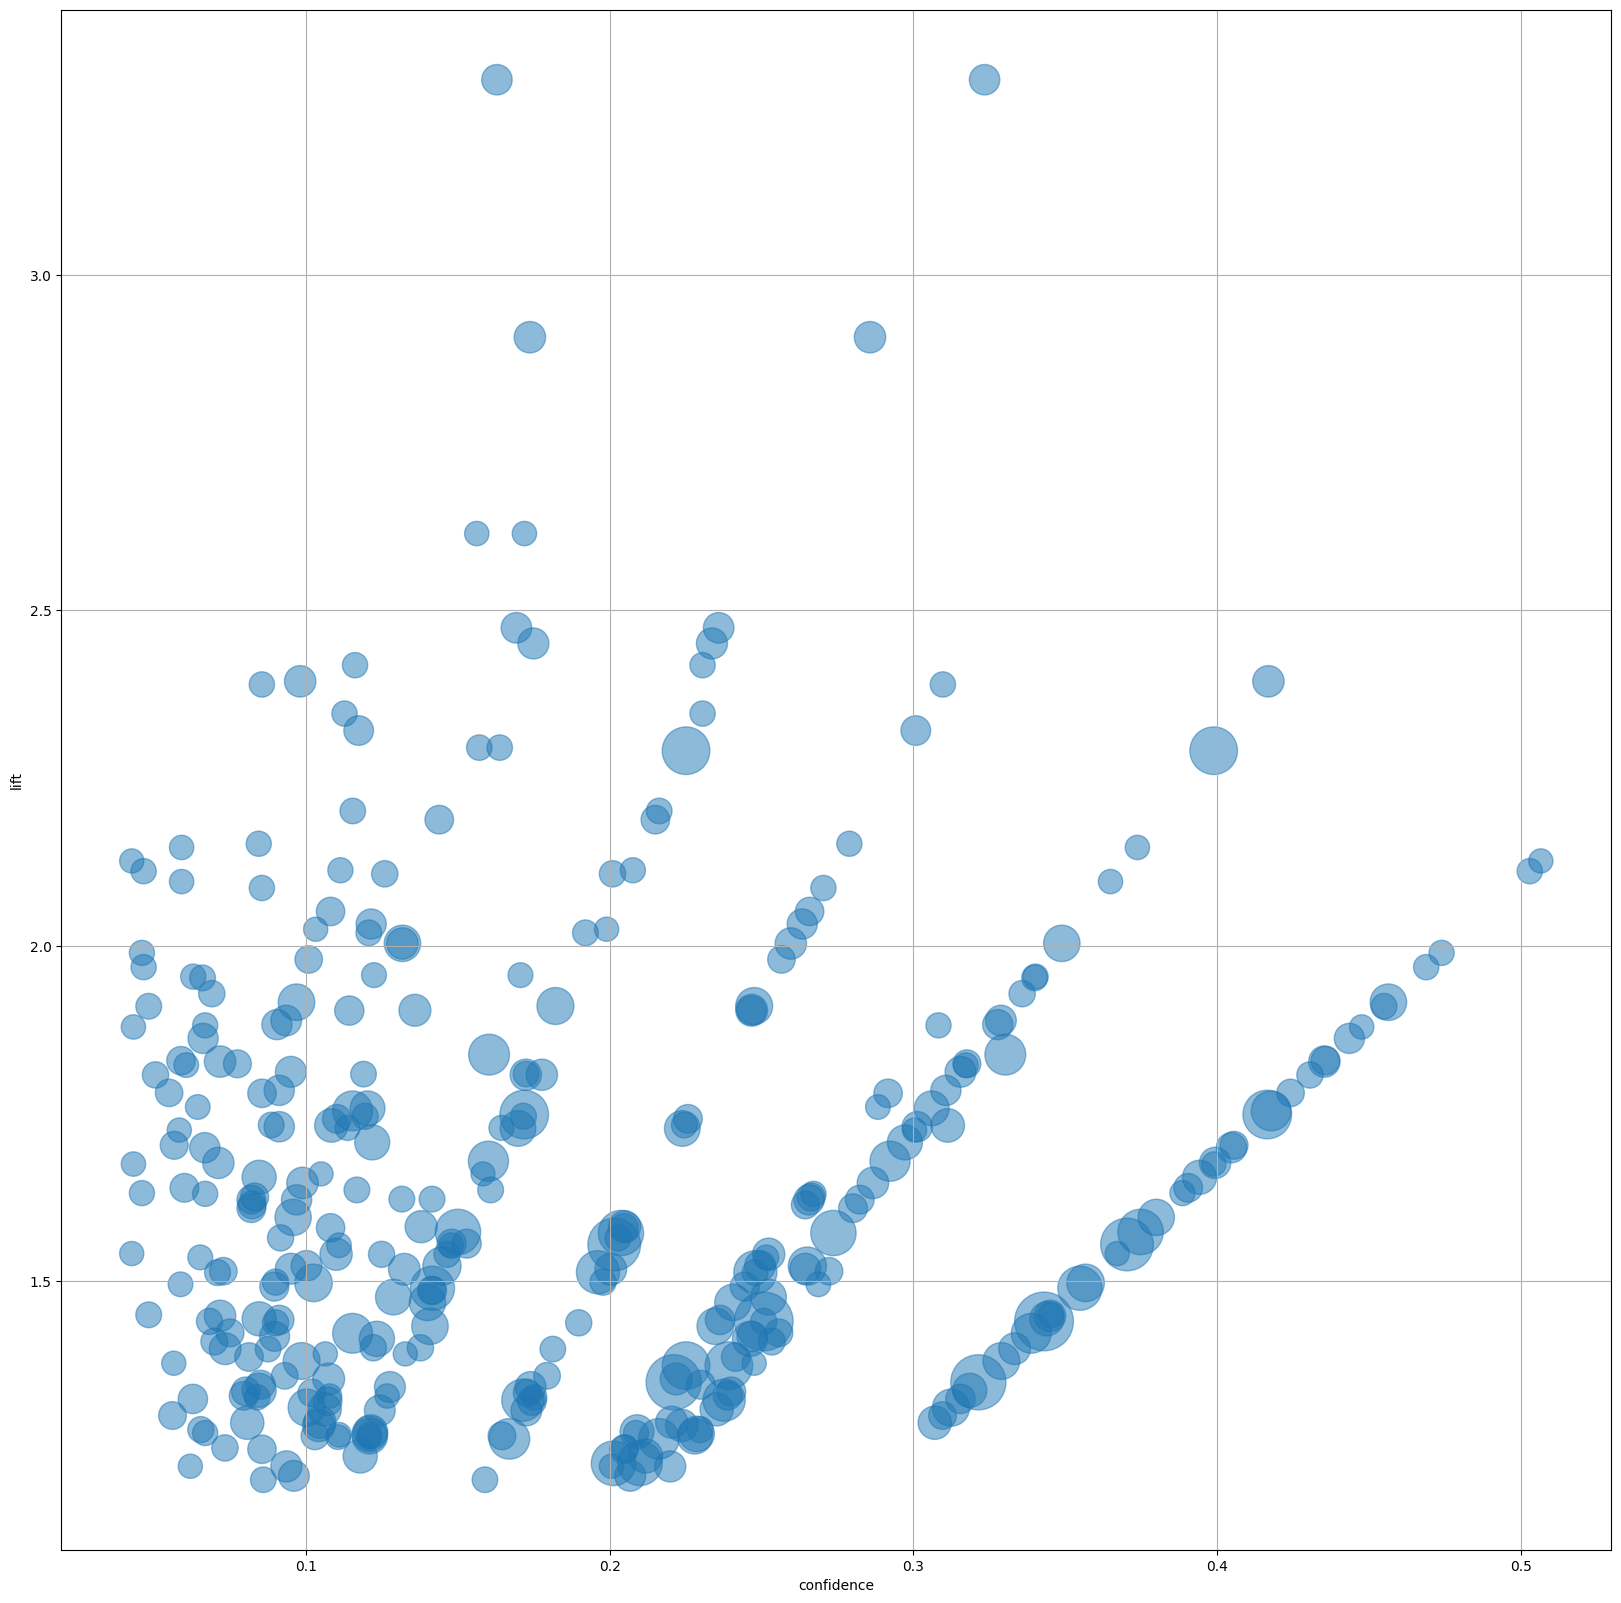

In [92]:
plt.scatter(rules['confidence'], rules['lift'], s=rules['support']*30000, alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.grid()
plt.show()

#### Based on the above graph I am going to look at the lift between 2 and 2.5 and confidence between 0.35 and 0.4 and sort the values by support<br/>This will allow me to identify one of the most significant itemsets in the data.

In [97]:
rules[(rules['lift'] >= 2) & (rules['lift'] < 2.5) & (rules['confidence'] > 0.35) & (rules['confidence'] < .4)].sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length,s
172,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,1,1,7167183174968973473783815297819021689989265591...
234,(red wine),(spaghetti),0.028133,0.174133,0.010267,0.364929,2.095687,0.005368,1.300432,1,1,1524291284333980581729295522359944485228807686...
339,"(olive oil, mineral water)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,0.005484,1.318826,2,1,2508228255056559327717299405517639477515382672...


#### As we can see from the filter above, there is a significant interaction between ground beef and spagetti.<br/>Lift: The lift value well above 1 indicates that selling ground beef does significantly increase the probability of also selling spagetti.<br/>Confidence: Confidence of 40% indicates that there is a very reasonable likelihood that these products will be sold together.<br/>Support: This is a very good support value which indicates that there are a reasonable number of transactions out of all transactions that contain ground beef and spagetti.

## Explanation of other combinations of support, confidence and lift<br/>
#### If we looked at the top right of the scatter plot at a small bubble where lift is high, confidence is high and support is low (small bubble indicates low support), we could make the following statement:
> The high lift and confidence suggests a high probability that these products will sell together and that the antecedent drives sales of the consequent, but there are hardly any sales of these products in the first place. In other words these products sell together, but you may only sell this item once a month or year (depending on context) <br/><br/>
#### If we looked at a big bubble towards the bottom right of the chart which suggests high support and good confidence, but a low lift, we could say:
> that you are selling a good number of the products and they sometimes sell together, but that bundling the products together is not going to affect how many you sell

## 6. Conclusion

#### The following product combinations should be the focus of commercial marketing strategies (in this order):
1. Ground Beef & Spagetti
2. Red Wine & Spagetti
3. Olive Oil, Mineral Water & Spagetti

### The absence of pricing and other commercial data limits the extent of the recommendations